In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Reading the data

In [42]:
data= pd.read_csv("C:\\Users\\Username\\Desktop\\Mins_Score.csv")
data.drop(['Student'], axis=1, inplace=True)
data

,Minutes,% Score
0,0,45
1,5,47
2,10,58
3,15,55
4,20,62
5,25,65
6,30,67
7,35,70
8,40,72
9,46,73


In [43]:
data.isnull().sum()

Minutes    0
% Score    0
dtype: int64

There are no null values and hence data cleaning is not required. 

In [44]:
data.describe()

,Minutes,% Score
count,16.000000,16.000000
mean,38.375000,69.562500
std,25.027651,13.870683
min,0.000000,45.000000
25%,18.750000,61.000000
50%,37.500000,71.000000
75%,56.000000,79.000000
max,80.000000,94.000000


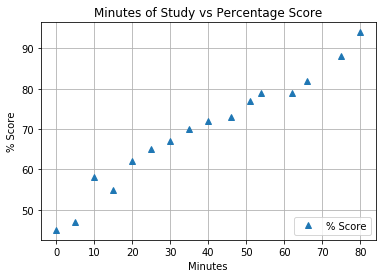

In [45]:
data.plot(x='Minutes', y='% Score', style='^')
plt.title('Minutes of Study vs Percentage Score')
plt.xlabel('Minutes')
plt.ylabel('% Score')
plt.grid()
plt.legend( loc = 'lower right')
plt.show()

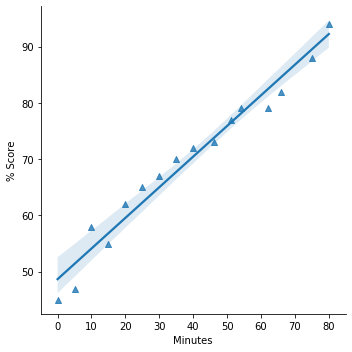

In [46]:
sns.lmplot(x='Minutes',y='% Score',data=data, palette='coolwarm',
          markers='^')

The graph above depicts a positive linear relation between the number of minutes studied and the % score.

# Preparing the data

Defining "attributes", which is the input variable and "labels" is output variable.

In [47]:
X = data.iloc[:, :-1].values #Attribute
Y = data.iloc[:, 1].values   #Labels

Attributes and labels have been defined, the next step is to split this data into training and test sets. 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

The training and test sets are ready for training our model.

# Training the Algorithm

In [49]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, Y_train)
Y_predict = linearRegressor.predict(X_train)

In [50]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print("Coefficient:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficient: [0.50036816]
Intercept: 51.10938394829419


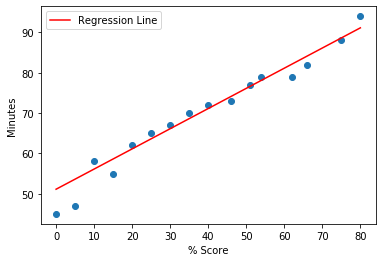

In [52]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X,Y)
plt.plot(X, line, color='red', label='Regression Line')
plt.xlabel("% Score")
plt.ylabel("Minutes")
plt.legend()
plt.show()

# Predictions

Since we have trained the algorithm, now we can make predictions. 

In [53]:
print(X_test)
Y_pred = regressor.predict(X_test) 

[[ 0]
 [ 5]
 [25]
 [75]]


In [54]:
data = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
data

,Actual,Predicted
0,45,51.109384
1,47,53.611225
2,65,63.618588
3,88,88.636996


In [55]:
print("Training Score:", regressor.score(X_train, Y_train))
print("Test Score:", regressor.score(X_test, Y_test))

Training Score: 0.9655009012849427
Test Score: 0.9303556065629458


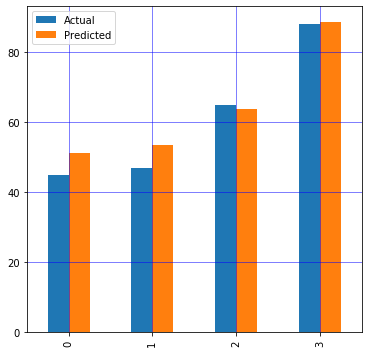

In [56]:
data.plot(kind='bar',figsize=(6,6))
plt.grid(which='major', linewidth='0.5', color='blue')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [57]:
#Testing with new data
minutes = 27
print('% Score of student who studied for 27 minutes is :', regressor.predict([[27]]))

% Score of student who studied for 27 minutes is : [64.61932422]


# Evaluating the model

In [58]:
# Checking how efficient the model is

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 3.6847541520085034
Mean Squared Error: 20.83673196144865
Root Mean Squared Error: 4.564726931750535
R-squared: 0.9303556065629458
